# The `swifttools.ukssdc.data.GRB` module

## Summary

This module provides direct access to the [GRB products created at the UKSSDC](https://www.swift.ac.uk/xrt_products), as well as the means to manipulate them (e.g. rebinning light curves). Being part of the [`swifttools.ukssdc.data` module](../data.ipynb) it is designed for use where you already know which GRB(s) you want to get data for. If you don't know that, for example you want to select them based on their characteristics, you will need the [GRB query module](../query/GRB.ipynb).

**Tip** You can read this page straight through, and you may want to, but there is a lot in it. So if you want a full overview, read through. If you want to know how to do do something specific, I'd advise you to read the introduction, and then use the [contents links](#page-contents) to jump straight to the section you are interested in.

You will notice that the functions in this module all begin with `get` (whereas the parent module used `download`). As you'll realise pretty quickly, this is because this module lets you do more than just download datafiles, you can instead pull the data into variables for example.

An important point to note is that this documentation is about the API, not the GRB products. So below we will talk about things like WT mode systematic errors, and unreliable light curve data, without any real explanation; you can read the documentation for the products if you don't understand.

OK, first let's import the module, using a short form to save our fingers:

In [1]:
import swifttools.ukssdc.data.GRB as udg

One could basically loop through the below code with the appropriate Swift name for every GRB. I just typed them in and checked if they had data in the interval, and if it was only one point, if that wasn't the first or last point of the lightcurve.

20    22293.110
21    28269.988
22    35210.239
23    47892.576
Name: Time, dtype: float64


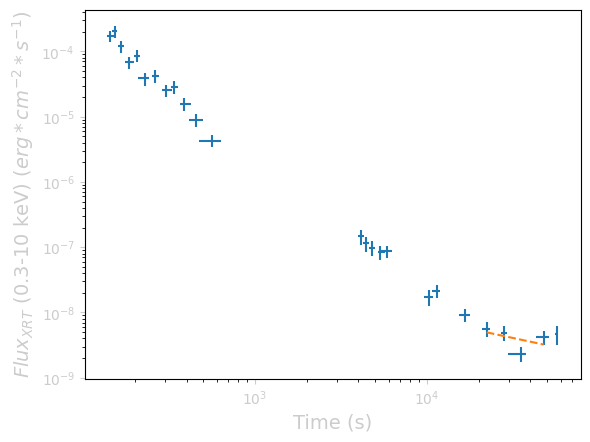

In [218]:
import swifttools.ukssdc.data.GRB as udg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
data = udg.getBurstAnalyser(GRBName="GRB 080727C",
                                returnData=True,
                                saveData=False,
                           instruments=('XRT', 'UVOT'))
# print(list(data['XRT'].keys()))
# Flux_dens_pos=pd.DataFrame(np.concatenate((data['XRT']['Density_WT_incbad']['FluxPos'],\
#                         data['XRT']['Density_PC_incbad']['FluxPos'])))
# Flux_dens_neg=pd.DataFrame(np.concatenate((data['XRT']['Density_WT_incbad']['FluxNeg'],\
#                         data['XRT']['Density_PC_incbad']['FluxNeg'])))
# time_pos=pd.DataFrame(np.concatenate((data['XRT']['Density_WT_incbad']['TimePos'],\
#                         data['XRT']['Density_PC_incbad']['TimePos'])))
# time_neg=pd.DataFrame(np.concatenate((data['XRT']['Density_WT_incbad']['TimeNeg'],\
#                         data['XRT']['Density_PC_incbad']['TimeNeg'])))
# time=np.concatenate((data['XRT']['Density_WT_incbad']['Time'], \
#                 data['XRT']['Density_PC_incbad']['Time']))
# flux=np.concatenate((data['XRT']['Density_WT_incbad']['Flux'], \
#                 data['XRT']['Density_PC_incbad']['Flux']))
# flux_error=np.transpose(np.column_stack((Flux_dens_pos.fillna(0),\
#         np.abs(Flux_dens_neg.fillna(0)))))
# time_error=np.transpose(np.column_stack((time_pos.fillna(0),\
#         np.abs(time_neg.fillna(0)))))
Flux_dens_pos=data['XRT']['Density_PC_incbad']['FluxPos']
Flux_dens_neg=data['XRT']['Density_PC_incbad']['FluxNeg']
time_pos=data['XRT']['Density_PC_incbad']['TimePos']
time_neg=data['XRT']['Density_PC_incbad']['TimeNeg']
time=data['XRT']['Density_PC_incbad']['Time']
flux=data['XRT']['Density_PC_incbad']['Flux']
flux_error=np.transpose(np.column_stack((Flux_dens_pos.fillna(0),\
        np.abs(Flux_dens_neg.fillna(0)))))
time_error=np.transpose(np.column_stack((time_pos.fillna(0),\
        np.abs(time_neg.fillna(0)))))
# Flux_dens_pos=data['XRT']['Density_WT_incbad']['FluxPos']
# Flux_dens_neg=data['XRT']['Density_WT_incbad']['FluxNeg']
# time_pos=data['XRT']['Density_WT_incbad']['TimePos']
# time_neg=data['XRT']['Density_WT_incbad']['TimeNeg']
# time=data['XRT']['Density_WT_incbad']['Time']
# flux=data['XRT']['Density_WT_incbad']['Flux']
# flux_error=np.transpose(np.column_stack((Flux_dens_pos.fillna(0),\
#         np.abs(Flux_dens_neg.fillna(0)))))
# time_error=np.transpose(np.column_stack((time_pos.fillna(0),\
#         np.abs(time_neg.fillna(0)))))
# z=2.3739
# timeshift=200*(1+z)
# # timeshift=2000
# print(timeshift)
# start_time=np.where(time >= timeshift)[0][0]
# print(time[start_time])
timeshift=10**(-0.301)*36600
# timeshift=0
start_time=(np.where(time >= timeshift)[0])[0]
timeclaw=10**(0.301)*36600
stop_time=max(np.where(time<= timeclaw)[0])
coefficients = np.polyfit(np.log10(time[start_time:stop_time]), \
                          np.log10(flux[start_time:stop_time]), 1)
polynomial = np.poly1d(coefficients)
log10_y_fit = polynomial(np.log10(time[start_time:stop_time]))
plt.errorbar(x=time, \
             y=flux, \
            xerr=time_error, yerr=flux_error, ls='none')
plt.plot(time[start_time:stop_time], 10**log10_y_fit, '--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Time (s)', \
           color='0.8', size=14)
plt.ylabel(r'${Flux}_{XRT}$ (0.3-10 keV) $(erg*cm^{-2}*s^{-1})$', \
           color='0.8', size=14)
plt.tick_params(axis='x', colors='0.8')
plt.tick_params(axis='y', colors='0.8')
# print(polynomial[1])
print(time[start_time:stop_time])